# Repeated Price Competition with Differentiated Products

* Write player functions, `player1.py`, `player2.py`, ... in the folder `./players/`. 
* Run this notebook: it will automatically read them all.

In [1]:
from game_tournament.game import RepeatedBertrandGame, Tournament
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

%load_ext autoreload
%autoreload 2 

In [2]:
np.random.seed(1337)

# Reading in player modules 

In [3]:
# later, we will give the path directly to a function
player_path = './players/'

# General setup

In [4]:
c = 0.5
beta = 0.95 # discount factor
pmin = c
pmax = 5.

### Demand curve
$$ D_i(p_i, p_j) = \frac{\exp(\beta_0-\beta_1 p_i)}{1 + \exp(\beta_0 - \beta_1 p_i) + \exp(\beta_0 - \beta_1 p_j)} $$

In [5]:
b0 = 3.
b1 = 3. 
price_range = (pmin, pmax)

def demand_function(pi, pj): 
    u = np.array([b0-b1*pi, b0-b1*pj, 0.0])
    u -= np.max(u) # to avoid overflow
    eu = np.exp(u)
    market_share_i = eu[0] / np.sum(eu)

    return market_share_i 

def profit1(p1,p2): 
    s1 = demand_function(p1,p2)
    return s1 * (p1-c)

def profit2(p2,p1): # Note: own price comes first 
    s2 = demand_function(p2,p1)
    return s2 * (p2-c)

    

# Running a Tournament

This will run a full tournament between all the player functions found in the folder `player_path`. 

In [6]:
T = 100
game_data = {'profit_function1':profit1, 'profit_function2':profit2, 'discount_factor': beta, 
    'price_range': (pmin,pmax)
}
t = Tournament(player_path, RepeatedBertrandGame, game_data=game_data, T=T, tournament_name='Dynamic Pricing', )
t.run() # run the tournament and score the game 

10it [00:09,  1.09it/s]

Tournament winner was: Trigger (against 4 opponents)


,Dynamic Pricing
Player,
Trigger,0.036430
Tit-for-tatter,0.011253
Randawg,0.008018
Undercutting Bastard,0.003124
pmin,0.000000


In [7]:
matchup_results = t.get_matchup_results()
matchup_results

Opponent,Trigger,Randawg,Tit-for-tatter,Undercutting Bastard,pmin
Player,,,,,
Trigger,NaN,0.046072,0.036151,0.048424,1.507534e-02
Randawg,0.009360,NaN,0.010705,0.008667,3.339244e-03
Tit-for-tatter,0.030892,0.009987,NaN,0.004132,9.835546e-08
Undercutting Bastard,0.002884,0.004842,0.004768,NaN,1.004177e-06
pmin,0.000000,0.000000,0.000000,0.000000,NaN


Print the matchup results to see if there is a pattern in who is good against whom. 

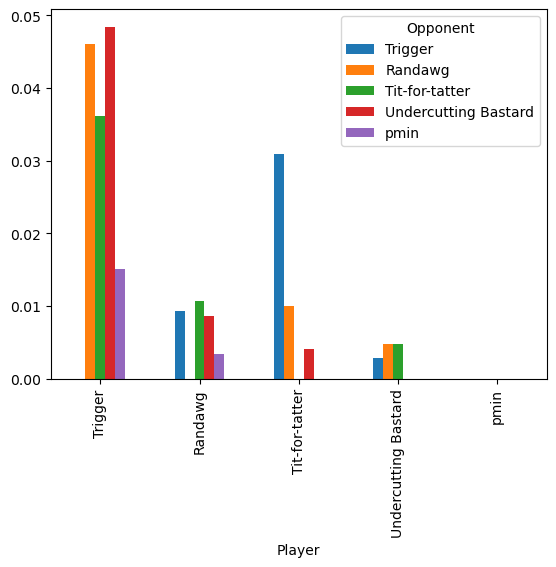

In [8]:
matchup_results.plot.bar(); 

# Access individual games

It can be useful to access individual games from the tournament to check performance. To do so, note that `t.games[:]` is the list of the games that were played. Each of these have the same printing and plotting functions as a simple game has.  

In [9]:
print(f'Available games in tournament:')
for i,g in enumerate(t.games): 
    print(f'{i}: {g.name}')

Available games in tournament:
0: Trigger vs. Randawg
1: Trigger vs. Tit-for-tatter
2: Trigger vs. Undercutting Bastard
3: Trigger vs. pmin
4: Randawg vs. Tit-for-tatter
5: Randawg vs. Undercutting Bastard
6: Randawg vs. pmin
7: Tit-for-tatter vs. Undercutting Bastard
8: Tit-for-tatter vs. pmin
9: Undercutting Bastard vs. pmin


Showing game history for Trigger vs. Tit-for-tatter


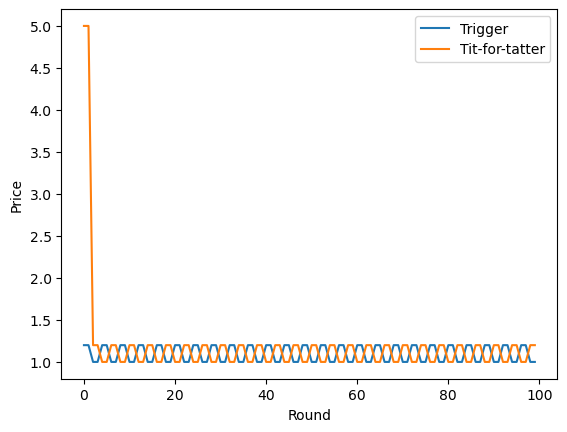

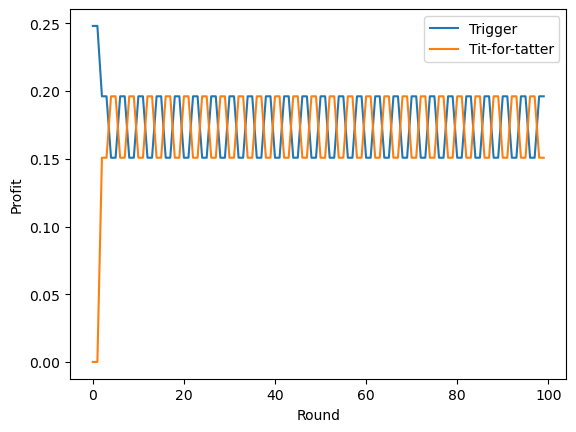

In [11]:
i_game = 1
print(f'Showing game history for {t.games[i_game].name}')
t.games[i_game].get_game_actions_and_payoffs()['actions'].plot(ylabel='Price');
t.games[i_game].get_game_actions_and_payoffs()['payoffs'].plot(ylabel='Profit');